# sourmash: working with private collections of signatures

## download a bunch of genomes

In [ ]:
!mkdir -p big_genomes
!curl -L https://osf.io/8uxj9/?action=download | (cd big_genomes && tar xzf -)

## compute signatures for each file

In [ ]:
!cd big_genomes/ && sourmash compute -k 31 --scaled=1000 --name-from-first *.fa

## Compare them all

In [28]:
!sourmash compare big_genomes/*.sig -o compare_all.mat
!sourmash plot compare_all.mat

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 64 signatures total.                                                    
downsampling to scaled value of 1000

min similarity in matrix: 0.000
saving labels to: compare_all.mat.labels.txt
saving distance matrix to: compare_all.mat
== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loading comparison matrix from compare_all.mat...
...got 64 x 64 matrix.
loading labels from compare_all.mat.labels.txt
saving histogram of matrix values => compare_all.mat.hist.png
wrote dendrogram to: compare_all.mat.dendro.png
wrote numpy distance matrix to: compare_all.mat.matrix.png


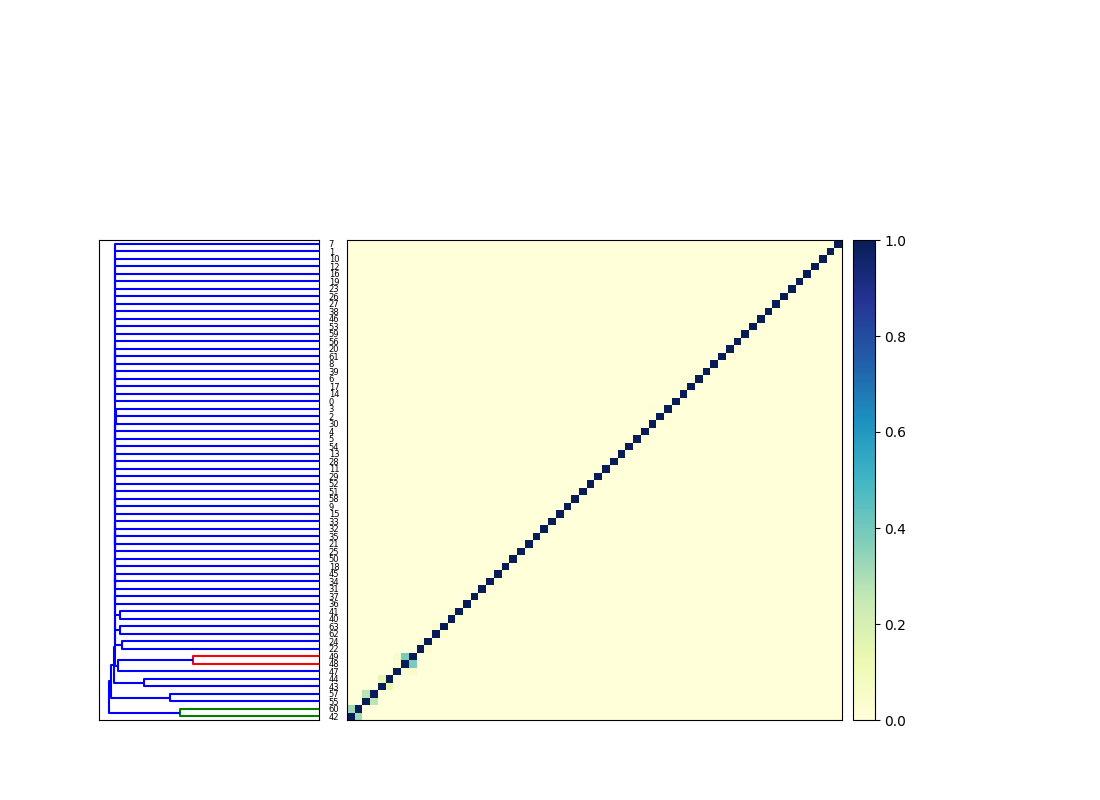

In [29]:
from IPython.display import Image
Image(filename='compare_all.mat.matrix.png') 

## make a fast(er) search database for all of them

In [ ]:
!sourmash index -k 31 all-genomes big_genomes/*.sig

You can now use this to search, and gather.

In [ ]:
!sourmash search shew_os185.fa.sig all-genomes --threshold=0.001

In [ ]:
# (make fake metagenome again, just in case)
!cat genomes/*.fa > fake-metagenome.fa
!sourmash compute -k 31 --scaled=1000 fake-metagenome.fa

In [ ]:
!sourmash gather fake-metagenome.fa.sig all-genomes

# build a database with taxonomic information --

for this, we need to provide a metadata file that contains accession => tax information.

In [ ]:
import pandas
df = pandas.read_csv('podar-lineage.csv')
df

In [ ]:
!sourmash lca index podar-lineage.csv taxdb big_genomes/*.sig  -C 3 --split-identifiers

This database 'taxdb.lca.json' can be used for search and gather as above:

In [ ]:
!sourmash gather fake-metagenome.fa.sig taxdb.lca.json

...but can also be used for taxonomic summarization:

In [ ]:
!sourmash lca summarize --query fake-metagenome.fa.sig --db taxdb.lca.json